# CNN architecture experiments

### Importing prerequisite libraries

In [40]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [41]:
data = pd.read_csv('/dataset_postag.csv',sep=',',names=['Msg','Tag'])
data1 = pd.read_csv('/dataset_POS.csv',sep=',',names=['Msg','Tag'])
data2 = pd.read_csv('/dataset_stemmed.csv',sep=',',names=['Msg','Tag'])

In [42]:
data.dropna(inplace=True)

In [43]:
data1.dropna(inplace=True)

In [44]:
data2.dropna(inplace=True)

In [45]:
data_X = data['Msg']
data_Y = data['Tag']
data1_X = data1['Msg']
data1_Y = data1['Tag']
data2_X = data2['Msg']
data2_Y = data2['Tag']

#CNN Again

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, GRU, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
import pandas  as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [47]:
def max_sen_length(data):
    mx_len = 0
    for sen in data:
        words = sen.split()
        if len(words) > mx_len:
            mx_len = len(words)
    return mx_len

In [48]:
sen_len = max_sen_length(data_X)

sen_len1 = max_sen_length(data1_X)

sen_len2 = max_sen_length(data2_X)
vocab_size = 10000

In [49]:
onehot_enc = [one_hot(sen, vocab_size) for sen in data_X]

onehot1_enc = [one_hot(sen, vocab_size) for sen in data1_X]

onehot2_enc = [one_hot(sen, vocab_size) for sen in data2_X]

In [50]:
embed_repr = pad_sequences(onehot_enc, padding='pre', maxlen=sen_len)
embed_repr1 = pad_sequences(onehot1_enc, padding='pre', maxlen=sen_len1)
embed_repr2 = pad_sequences(onehot2_enc, padding='pre', maxlen=sen_len2)

In [51]:
embedding_vector_features = 100

In [52]:
oversample = SMOTE()
x, y = oversample.fit_sample(embed_repr, data_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [53]:
x1, y1 = oversample.fit_sample(embed_repr1, data1_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
x2, y2 = oversample.fit_sample(embed_repr2, data2_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers. normalization import BatchNormalization

In [193]:
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=sen_len))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(64, 2, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

In [196]:
y_pred = model.predict_classes(x_test)

In [197]:
confusion_matrix(y_test, y_pred)

array([[764, 163],
       [215, 726]])

In [201]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.797644539614561
0.7934426229508196
0.7715196599362381
0.8166479190101237


In [199]:
%matplotlib inline

In [167]:
list(model.history)

TypeError: ignored

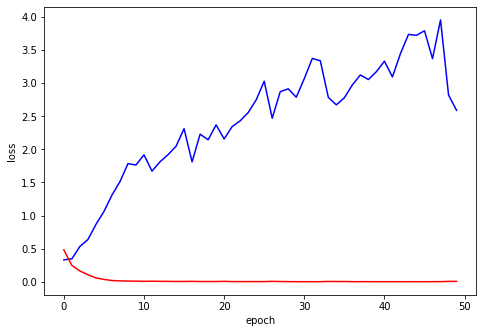

In [200]:
import matplotlib.pyplot as plt
loss_values = []
from math import ceil
fig = plt.figure() 
# ax = fig.add_subplot(1, 1, 1) 
ax = fig.add_axes([0,0,1,1])
ax.plot(history.history['val_loss'], 'b')
ax.plot(history.history['loss'], 'r')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()


#BERT



In [100]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 51kB 3.2MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.7-cp36-none-any.whl size=30539 sha256=006b1a65946483076c61df2f0e0ae945a99d51ae2b7e2ec5c96ae441a7de053b
  Stored in directory: /root/.cache/pip/wheels/e1/f8/e2/b98f79a6b8cc898d8e4102b83acb8a098df7d27500a2bac912
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7304 sha256=586180ec51ad636b96daab185945f34056aff2e0a408bd2e082a92d170842b11
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19475 sha256=9f283627d0e159be735cf23f954cb8e77bd3435a10dabae7be43b83bbed6db92
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [102]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 163kB/s 
     |████████████████████████████████| 983kB 40.4MB/s 
     |████████████████████████████████| 266kB 36.7MB/s 
     |████████████████████████████████| 471kB 44.1MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.0-cp36-none-any.whl size=25274500 sha256=7603157251bfe0b995415c799912774fb6aafdce62f52b059aa57d5f0ef6f7bb
  Stored in directory: /root/.cache/pip/wheels/5c/73/05/f36d0027bb6575384e21506dbba8db36a7825f15a24f09b2d5
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=06debf7f93f873764499bec3269e529ae750c8376c76ba4d24bcb3080382bae2
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=324608139429ccb5d5278972313fd1793b00c5a06ebfed7f7ef4c1e4fb31aefd
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d66

In [104]:
import tensorflow as tf

import tensorflow_hub as hub
import pandas as pd

from tensorflow.keras import layers
import bert

In [147]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU


df = pd.read_csv("/dataset_bert.csv")
df.head()

,text,label
0,It s like that at most public boards,0
1,I wonder if one of the victims opened the door...,0
2,Some people believe the Jack O Lantern also re...,0
3,Ready GO,0
4,Thanks,0


In [109]:


# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')



In [111]:
df['label'].value_counts(normalize = True)

0    0.868695
1    0.131305
Name: label, dtype: float64

In [112]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])

# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)



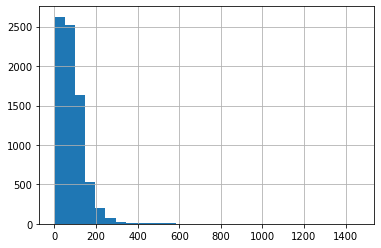

In [126]:
# get length of all the messages in the train set
#seq_len = [len(i) for i in train_text]
#train_text[0]
seq_len = []
for sent in train_text:
  try:
    seq_len.append(len(sent))
  except:
    seq_len.append(len(str(sent)))
pd.Series(seq_len).hist(bins = 30)

In [139]:
max_seq_len = max(seq_len)

In [148]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(list(train_text))

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


TypeError: ignored